In [7]:
from tams_pr2_guzheng.paths import RuckigPath
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy.stats as stats
import seaborn as sns

In [8]:
%load_ext autoreload
%autoreload 1
import sys
if '../utils' not in sys.path:
    sys.path.append('../utils')
import u
%aimport u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
D=pd.read_json('/tmp/plucks.json')

In [18]:
X=D[['string', 'pre_y', 'string_position', 'loudness']]
X.describe()

,pre_y,string_position,loudness
count,1862.000000,1.862000e+03,1296.000000
mean,-0.000068,1.438063e-01,49.182196
std,0.007002,1.181698e-01,8.147607
min,-0.007000,2.485000e-07,21.543703
25%,-0.007000,4.304107e-02,44.196374
50%,-0.007000,1.233734e-01,49.810511
75%,0.007000,2.229726e-01,55.043307
max,0.007000,4.728214e-01,65.927208


In [19]:
X= X.sort_values('string', key= lambda x: x.map(lambda a: librosa.note_to_midi(u.string_to_note(a))))

In [20]:
# new column 'direction' with values 'inwards' and 'outwards' depending on the sign of pre_y
X['pluck direction']= X['pre_y'].map(lambda y: 'inwards' if y < 0.0 else 'outwards')

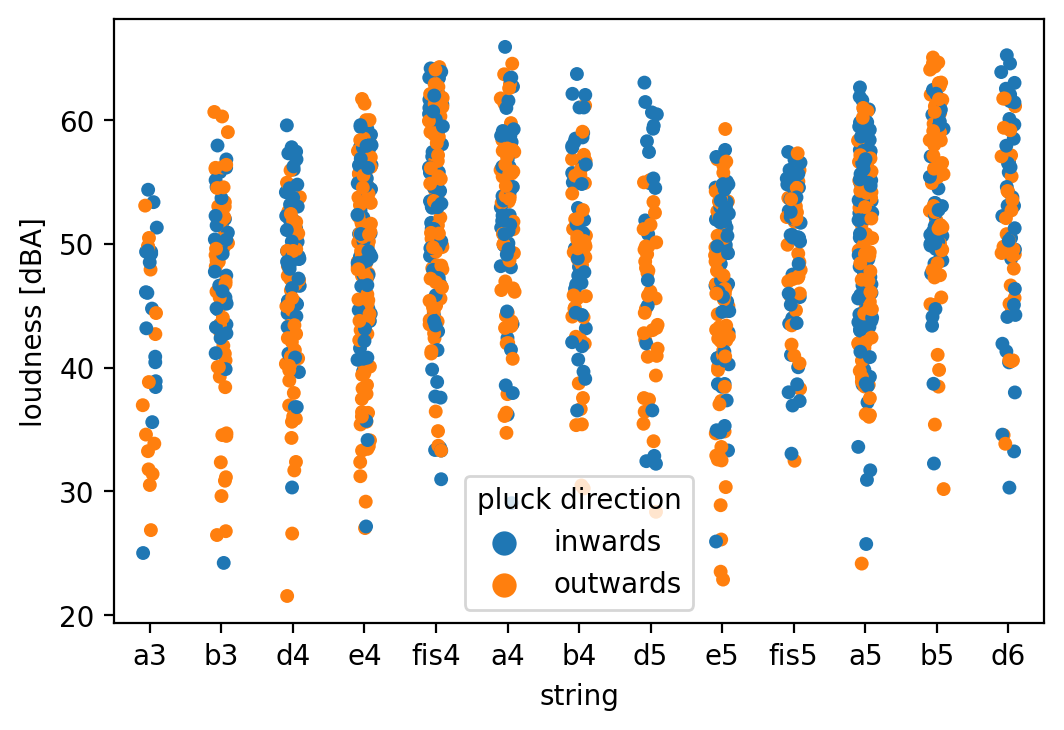

In [23]:
plt.figure(dpi=200)
ax = sns.stripplot(x=X['string'], y=X['loudness'], hue= X['pluck direction']);
plt.ylabel('loudness [dBA]')
plt.savefig('plucks_loudness.png', dpi=300)

In [ ]:

plt.savefig('/tmp/plucks_explore.png', dpi=300)